In [45]:
#| code-fold: true
#| code-summary: "Import Julia packages"
using Convex, ECOS, LinearAlgebra, Plots, Random, LaTeXStrings

In [47]:
m, n = 9, 3
A = randn(m, n)
b = randn(m)
function solveTikhonov(A, b, λ)
    x = Variable(n)
    problem = minimize(sumsquares(A*x - b) + λ*sumsquares(x))
    solve!(problem, ECOS.Optimizer(), verbose=false, silent_solver=true)
    x = evaluate(x)
    return norm(A*x-b), norm(x) 
end
function solveConstrained(A, b, τ)
    x = Variable(n)
    problem = minimize(sumsquares(A*x - b), sumsquares(x)≤τ)
    solve!(problem, ECOS.Optimizer(), verbose=false, silent_solver=true)
    x = evaluate(x)
    return norm(A*x-b), norm(x) 
end
function solveFlipped(A, b, σ)
    x = Variable(n)
    p = minimize(sumsquares(x), sumsquares(A*x - b) ≤ σ)
    solve!(p, ECOS.Optimizer(), verbose=false, silent_solver=true)
    x = evaluate(x)
    return norm(A*x-b), norm(x)
end;

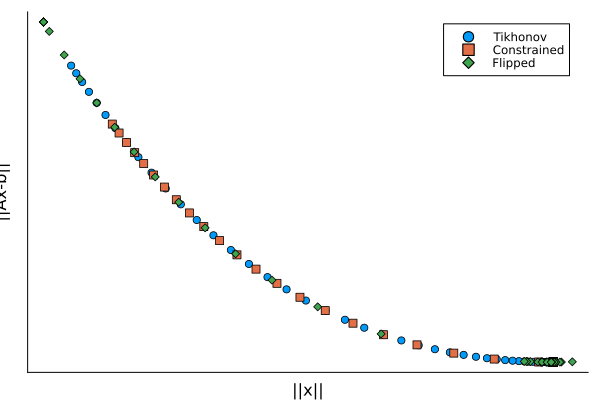

In [60]:
#| label: fig-tik-con-flip
#| echo: true
#| code-fold: true
#| fig-caption: "Tikhonov, constrained, and flipped solutions to an underdetermined system of equations."

# Generate a small random overdetermined system
Random.seed!(123)
m, n = 9, 3
A = randn(m, n)
b = randn(m)

# Solve min ||Ax-b||^2 + λ||x||^2
function solveTikhonov(A, b, λ)
    x = Variable(n)
    problem = minimize(sumsquares(A*x - b) + λ*sumsquares(x))
    solve!(problem, ECOS.Optimizer(), verbose=false, silent_solver=true)
    x = evaluate(x)
    return norm(A*x-b), norm(x) 
end

# Solve min ||Ax-b||^2 s.t. ||x||^2 ≤ τ
function solveConstrained(A, b, τ)
    x = Variable(n)
    problem = minimize(sumsquares(A*x - b), sumsquares(x)≤τ)
    solve!(problem, ECOS.Optimizer(), verbose=false, silent_solver=true)
    x = evaluate(x)
    return norm(A*x-b), norm(x) 
end

# Solve min ||x||^2 s.t. ||Ax-b||^2 ≤ σ
function solveFlipped(A, b, σ)
    x = Variable(n)
    p = minimize(sumsquares(x), sumsquares(A*x - b) ≤ σ)
    solve!(p, ECOS.Optimizer(), verbose=false, silent_solver=true)
    x = evaluate(x)
    return norm(A*x-b), norm(x)
end

# Plot ||x|| vs. ||Ax-b|| for various values of λ, τ, and σ
prange = LogRange(1e-2, 1e2, 50)
p1 = map(λ -> solveTikhonov(A, b, λ), prange)
p2 = map(τ -> solveConstrained(A, b, τ), prange)
p3 = map(σ -> solveFlipped(A, b, σ), range(1e-0, 1e1, 50))
p = plot(xlabel="||x||", ylabel="||Ax-b||", ticks=false)
scatter!(p, [pair[2] for pair in p1], [pair[1] for pair in p1], label="Tikhonov", mark=:circle)
scatter!(p, [pair[2] for pair in p2], [pair[1] for pair in p2], label="Constrained", mark=:square)
scatter!(p, [pair[2] for pair in p3], [pair[1] for pair in p3], label="Flipped", mark=:diamond)
